In [35]:
import numpy as np
import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd

%matplotlib inline

In [36]:
train = pd.read_csv("train.csv")

In [37]:
train.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


In [38]:
print("Number of training examples=", train.shape[0], "\n", "Number of classes=", len(train.label.unique()))

Number of training examples= 9473 
 Number of classes= 41


In [39]:
print(train.label.unique())

['Hi-hat' 'Saxophone' 'Trumpet' 'Glockenspiel' 'Cello' 'Knock'
 'Gunshot_or_gunfire' 'Clarinet' 'Computer_keyboard' 'Keys_jangling'
 'Snare_drum' 'Writing' 'Laughter' 'Tearing' 'Fart' 'Oboe' 'Flute' 'Cough'
 'Telephone' 'Bark' 'Chime' 'Bass_drum' 'Bus' 'Squeak' 'Scissors'
 'Harmonica' 'Gong' 'Microwave_oven' 'Burping_or_eructation' 'Double_bass'
 'Shatter' 'Fireworks' 'Tambourine' 'Cowbell' 'Electric_piano' 'Meow'
 'Drawer_open_or_close' 'Applause' 'Acoustic_guitar' 'Violin_or_fiddle'
 'Finger_snapping']


In [40]:
x, sr = librosa.load('freesound-audio-tagging/audio_train/2a871432.wav') #turn audio file into numpy array(float)

In [41]:
print(x.shape)
print(sr)

(623574,)
22050


In [42]:
subset = train.head(10)

In [43]:
subset

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1
5,003b91e8.wav,Cello,0
6,003da8e5.wav,Knock,1
7,0048fd00.wav,Gunshot_or_gunfire,1
8,004ad66f.wav,Clarinet,0
9,0063ab88.wav,Computer_keyboard,0


In [44]:
subset.columns

Index(['fname', 'label', 'manually_verified'], dtype='object')

In [45]:
def get_info(df): #function to visualize and get basic info about each audio file
    for each in subset['fname']:
        fname = 'freesound-audio-tagging/audio_train/' + each
        x, sr = librosa.load(fname, sr = None) #get array and sampling rate, sr = none to preserve sampling rate
        print(each, ":", '\n', "Sampling rate =", sr, '\n', "length =", x.shape, '\n')
        plt.figure(figsize = (14,5))
        librosa.display.waveplot(x, sr = sr) #plot each waveform; mono because amplitude = [-abs(y), abs(y)]
        plt.title(subset.loc[df['fname'] == each, 'label'].item()) #label with corresponding label

00044347.wav : 
 Sampling rate = 44100 
 length = (617400,) 

001ca53d.wav : 
 Sampling rate = 44100 
 length = (455112,) 

002d256b.wav : 
 Sampling rate = 44100 
 length = (19404,) 

0033e230.wav : 
 Sampling rate = 44100 
 length = (352800,) 

00353774.wav : 
 Sampling rate = 44100 
 length = (199332,) 



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `item` has been deprecated and will be removed in a future version
  


003b91e8.wav : 
 Sampling rate = 44100 
 length = (585648,) 

003da8e5.wav : 
 Sampling rate = 44100 
 length = (59976,) 

0048fd00.wav : 
 Sampling rate = 44100 
 length = (45864,) 

004ad66f.wav : 
 Sampling rate = 44100 
 length = (308700,) 

0063ab88.wav : 
 Sampling rate = 44100 
 length = (1307124,) 



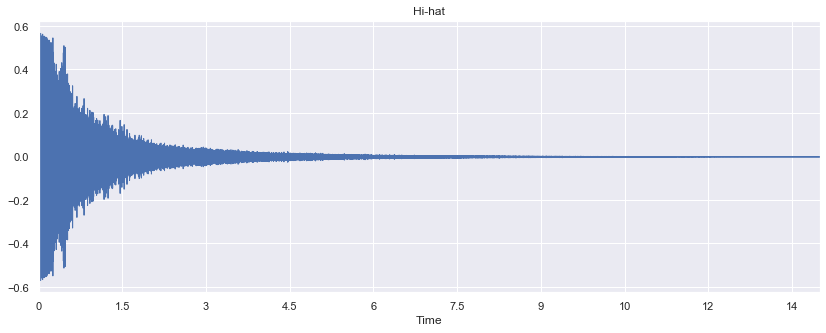

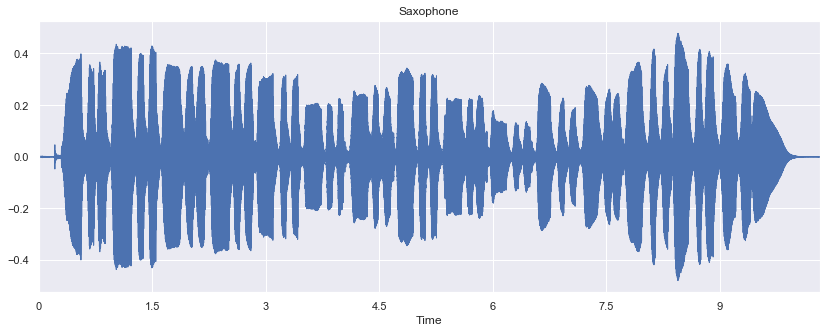

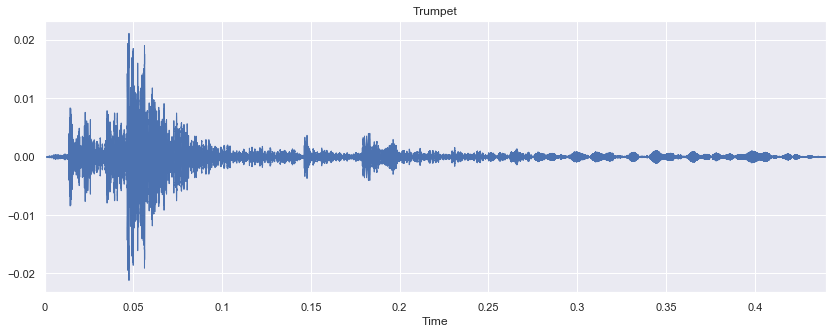

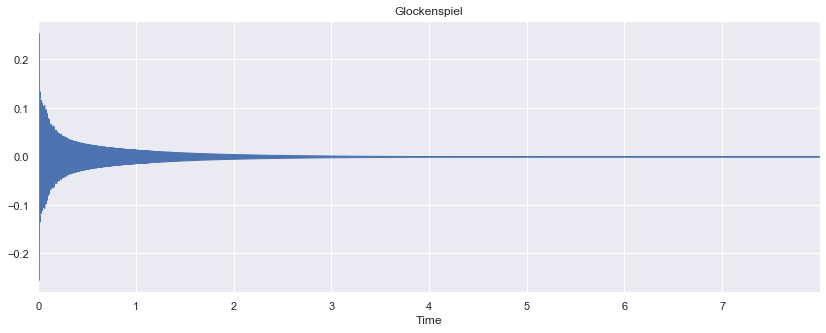

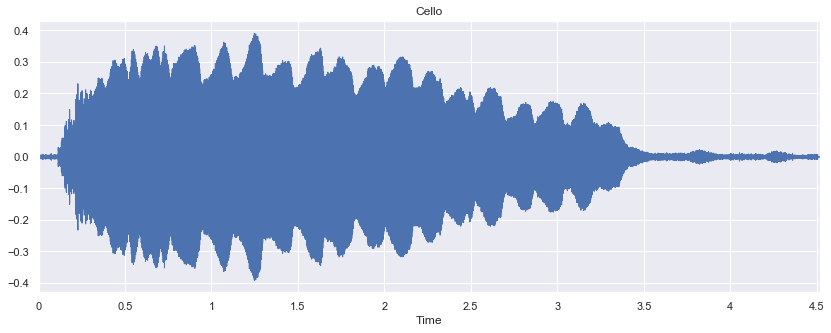

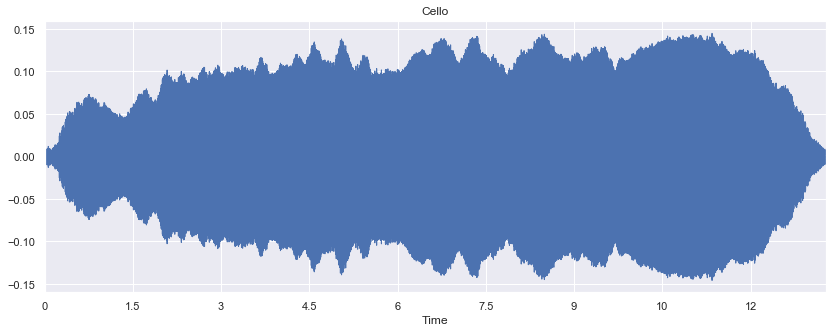

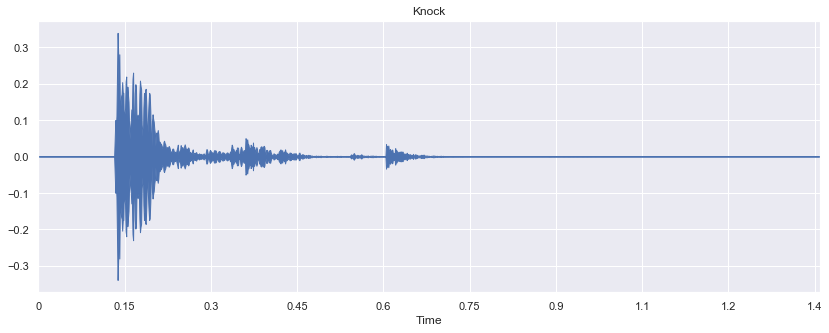

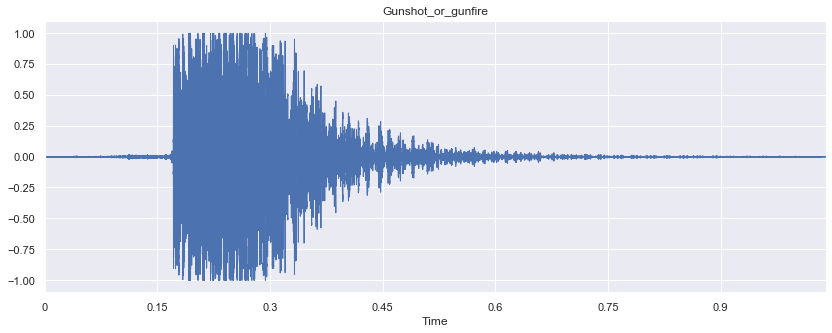

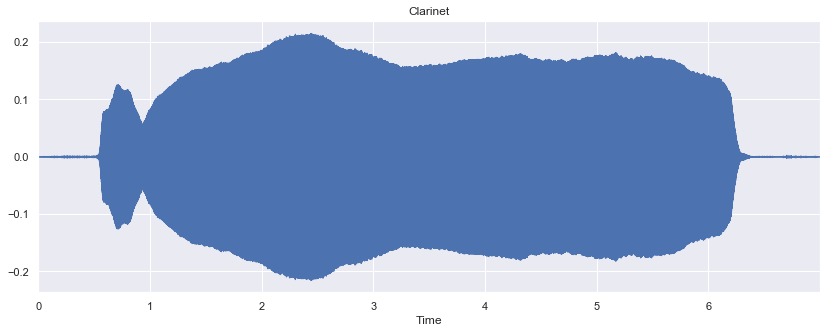

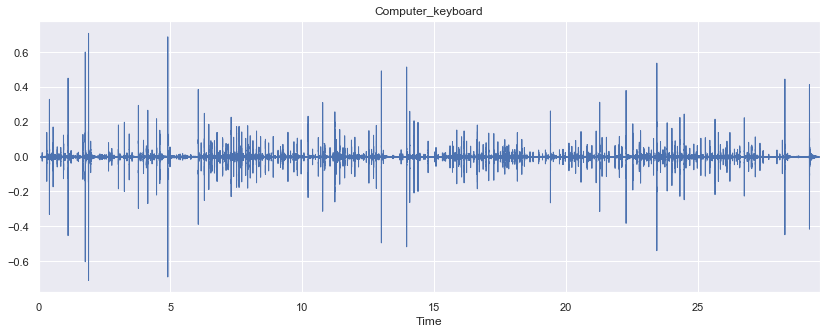

In [46]:
get_info(subset)

In [47]:
new_train = train

In [48]:
def get_duration(df):
    dur_list = []
    for each in new_train['fname']:
        fname = 'freesound-audio-tagging/audio_train/' + each
        x, sr = librosa.load(fname, sr = None)
        duration = librosa.get_duration(x, sr)
        dur_list.append(duration)
    return dur_list

In [51]:
durations = get_duration(new_train)

In [53]:
new_train["Duration"] = durations

In [54]:
new_train.head(10)

,fname,label,manually_verified,Duration
0,00044347.wav,Hi-hat,0,14.00
1,001ca53d.wav,Saxophone,1,10.32
2,002d256b.wav,Trumpet,0,0.44
3,0033e230.wav,Glockenspiel,1,8.00
4,00353774.wav,Cello,1,4.52
5,003b91e8.wav,Cello,0,13.28
6,003da8e5.wav,Knock,1,1.36
7,0048fd00.wav,Gunshot_or_gunfire,1,1.04
8,004ad66f.wav,Clarinet,0,7.00
9,0063ab88.wav,Computer_keyboard,0,29.64


In [55]:
#check values for durations by loading and playing audio
#ipd.Audio('freesound-audio-tagging/audio_train/00044347.wav') #14 seconds
#ipd.Audio('freesound-audio-tagging/audio_train/001ca53d.wav') #10 seconds
ipd.Audio('freesound-audio-tagging/audio_train/002d256b.wav') # 0 seconds, not clear

Some of the audio files in the dataset are 0 seconds, so they might not be clear enough to use.

In [56]:
is_zero = new_train['Duration'] < 0.50
new_train_zero = new_train[is_zero]
print(new_train_zero.shape)
print(new_train.shape)
new_train_zero.head(10)

(407, 4)
(9473, 4)


,fname,label,manually_verified,Duration
2,002d256b.wav,Trumpet,0,0.44
30,00fcbab2.wav,Bass_drum,0,0.44
84,024da466.wav,Tambourine,1,0.48
85,0256c2f2.wav,Keys_jangling,1,0.38
128,03cd971f.wav,Cowbell,0,0.42
135,03f38c68.wav,Hi-hat,0,0.40
159,0496718e.wav,Finger_snapping,1,0.36
172,051138fc.wav,Finger_snapping,1,0.34
202,060ba089.wav,Finger_snapping,1,0.36
237,06fd1973.wav,Hi-hat,0,0.38


In [19]:
ipd.Audio('freesound-audio-tagging/audio_train/020eb9f6.wav') #clear - bark

In [20]:
ipd.Audio('freesound-audio-tagging/audio_train/00fcbab2.wav') #not clear - bass drum

In [21]:
ipd.Audio('freesound-audio-tagging/audio_train/010aa387.wav') #clear - fart

In [22]:
ipd.Audio('freesound-audio-tagging/audio_train/03cd971f.wav') #clear - cowbell

In [23]:
ipd.Audio('freesound-audio-tagging/audio_train/03f38c68.wav') # clear - hi hat

The shorter sounds are mostly clear, but the model that will be used for audio classification needs to be able to detect the sounds.



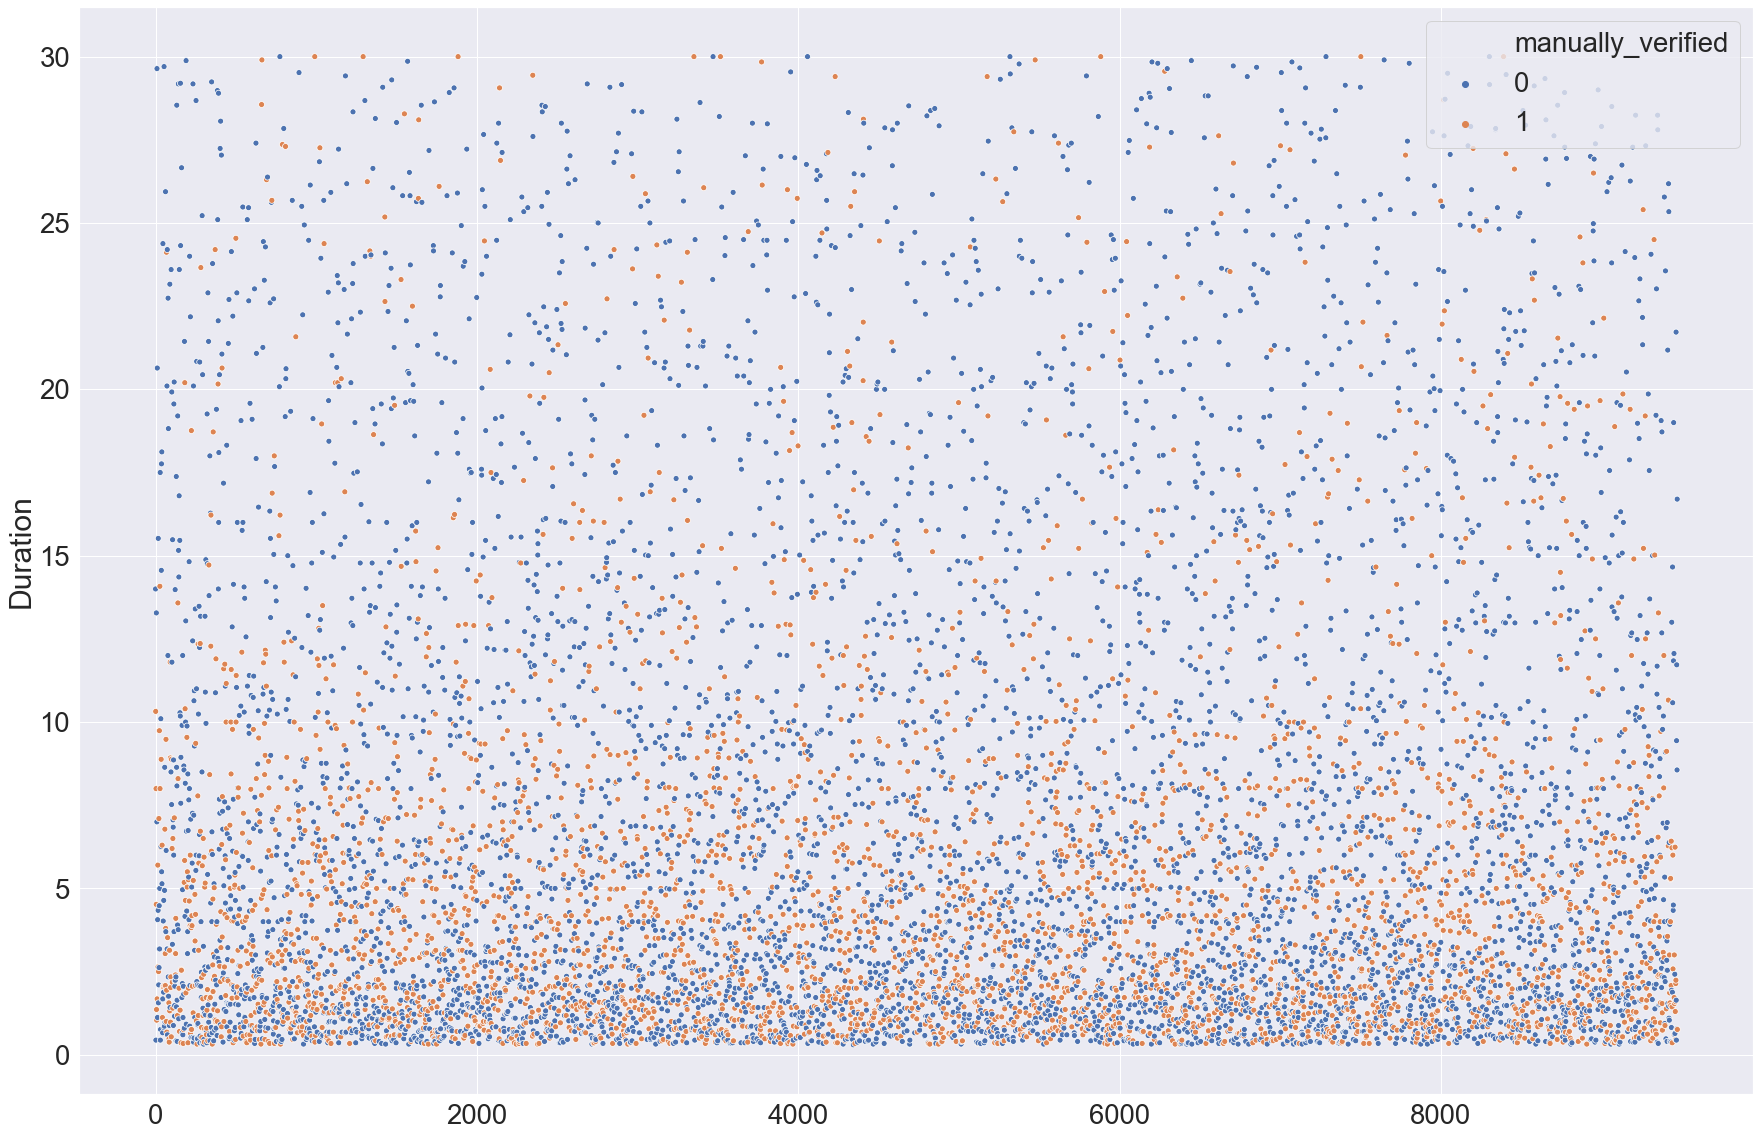

In [57]:
sns.set(font_scale = 2.5)
fig, ax = plt.subplots(figsize = (30, 20)) # plot the durations for every file
sns.scatterplot(x = new_train.index, y = "Duration", hue = "manually_verified",  
                ax = ax, data = new_train)

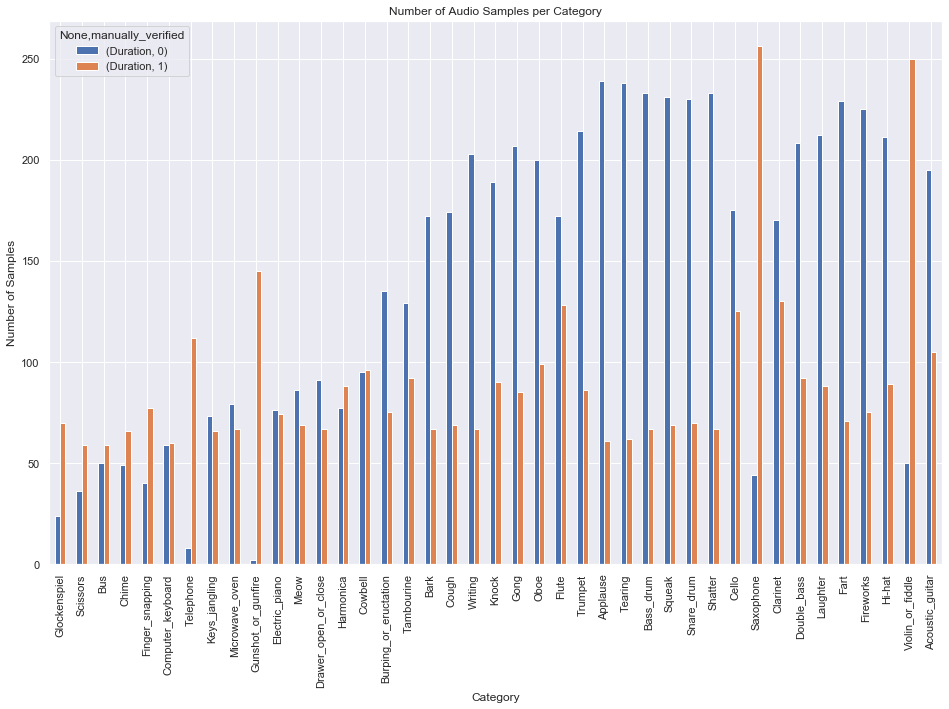

In [67]:
cat_group = new_train.groupby(['label', 'manually_verified']).count()
cat_group = cat_group.drop(columns = ['fname'])
plot = cat_group.unstack().reindex(cat_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=False, title="Number of Audio Samples per Category", figsize=(16,10))
sns.set(font_scale = 1)
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");

The non-verified samples have a 65%-70% accuracy, so we will use them to train our model. However, we need .wav files that are a certain length in order for the frequencies to actually be detected by the model. Otherwise, the model won't be well-trained. In order to solve this problem, we decided to drop all samples that are less than 3 seconds from our data set. The valid samples longer than 3 seconds will be saved in a csv file called valid_data.

In [71]:
is_valid = new_train['Duration'] > 2.97
valid_data = new_train[is_valid]
print(valid_data.shape)
print(train.shape)

(5591, 4)
(9473, 4)


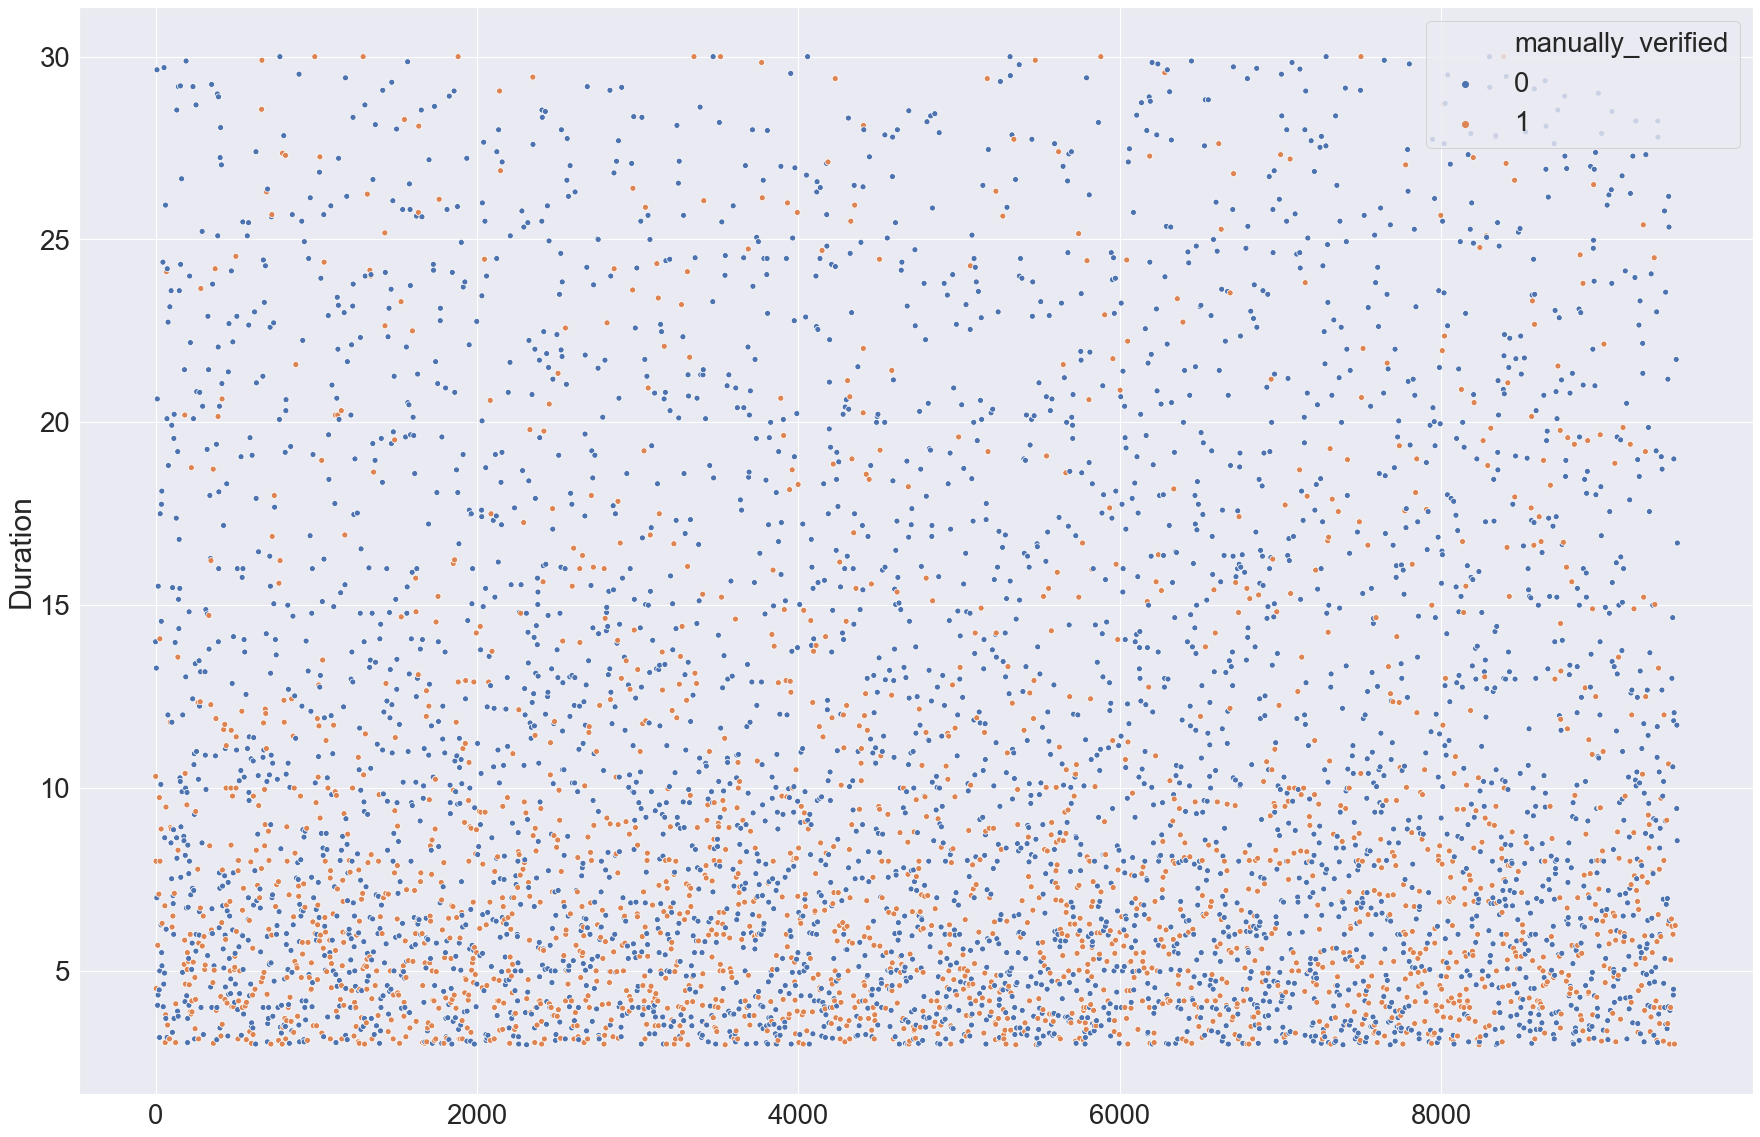

In [77]:
sns.set(font_scale = 2.5)
fig, ax = plt.subplots(figsize = (30, 20)) # plot the durations for every file
sns.scatterplot(x = valid_data.index, y = "Duration", hue = "manually_verified",  
                ax = ax, data = valid_data)

We still have a significant portion of our data to train the model on, but we might need to expand our data set in some way. 

In [75]:
valid_data.to_csv('valid_data', index = False)